In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("landslide_catalog.csv")

In [66]:
# df = df[['latitude', 'longitude', 'country_na']]
print(len(df))
df.head()

13493


,X,Y,FID,OBJECTID,source_nam,source_lin,event_id,event_date,event_time,event_titl,...,event_im_1,latitude,longitude,country_na,country_co,admin_divi,gazetteer_,gazetteer1,submitted_,last_edite
0,91.615772,23.717019,1,1537380,The Times of India,https://timesofindia.indiatimes.com/city/agart...,11502,2018/05/20 00:00:00+00,,Dhanlekha Kaipengpara Landslide Collapses House,...,,23.717019,91.615772,India,IN,Tripura,Metharaipara,17.21,2018/05/30 00:00:00+00,2019/05/16 00:00:00+00
1,98.531053,26.071735,2,1538980,NASA SERVIR Science Coordination Office & SERV...,https://servir.adpc.net/,11928,1970/01/01 00:00:00+00,,Landslide in Myanmar,...,349,26.071735,98.531053,Myanmar,MM,Kachin,Kangfang,8.36,2018/08/17 00:00:00+00,2019/05/16 00:00:00+00
2,7.129721,47.714502,3,1537381,Le Parisien,http://www.leparisien.fr/faits-divers/haut-rhi...,11531,2018/06/04 00:00:00+00,19:00,A36 Cut by a Mudslide at Burnhaupt-le-Haut,...,,47.714502,7.129721,France,FR,Alsace,Fontaine,10.97,2018/06/05 00:00:00+00,2019/05/16 00:00:00+00
3,170.551640,-45.879569,4,1537382,Otago Daily Times,https://www.odt.co.nz/news/dunedin/flooding-cl...,11532,2018/04/29 00:00:00+00,,Portobello Road Landslip near Proctors Road,...,,-45.879569,170.551640,New Zealand,NZ,Otago,Port Chalmers,9.21,2018/06/06 00:00:00+00,2019/05/16 00:00:00+00
4,75.943400,11.468510,5,1537383,The Times Of India,https://timesofindia.indiatimes.com/city/kozhi...,11548,2018/06/14 00:00:00+00,03:00,Kattipara Landslide,...,,11.468510,75.943400,India,IN,Kerala,Meppadi,24.11,2018/08/03 00:00:00+00,2019/05/16 00:00:00+00


In [67]:
df.country_na.value_counts()

United States    3763
India            1567
Myanmar          1118
Philippines       743
Nepal             568
                 ... 
Congo               1
Swaziland           1
Lithuania           1
Mongolia            1
Morocco             1
Name: country_na, Length: 153, dtype: int64

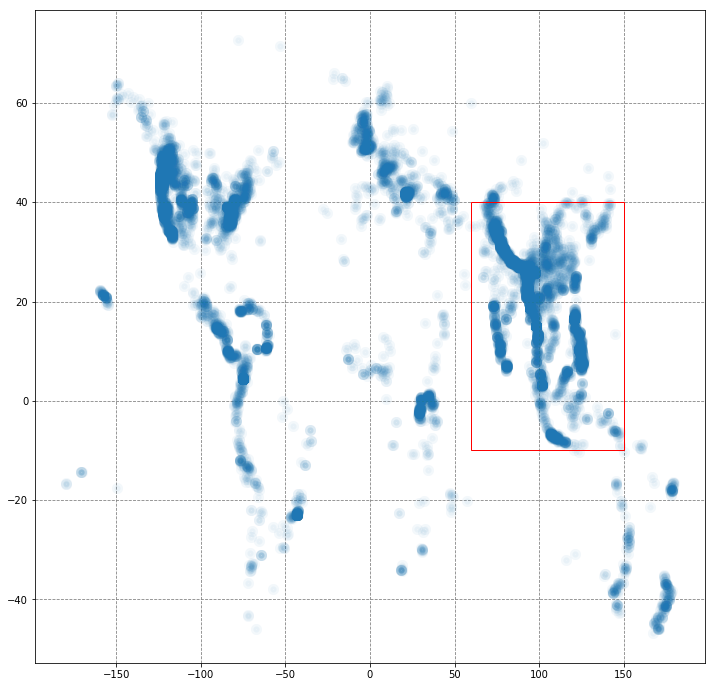

In [68]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(12, 12))
plt.scatter(x=df["longitude"], y = df['latitude'], alpha=0.05, linewidths=5)

ax = plt.gca()
rect = Rectangle((60,-10),90,50,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [69]:
# filter
# 60 East to 150 East
# -10 S to 40 N 

corner1 = [40, 60]
corner2 = [-10, 150]

def convert(field, func):
    df[field] = df[field].apply(func)

def filter():
    global df
    df = df[(df.latitude >= corner2[0]) & (df.latitude <= corner1[0]) & (df.longitude >= corner1[1]) & (df.longitude <= corner2[1])]

convert("latitude", float)
convert("longitude", float)
# df.fatality_c = df.fatality_c.map(lambda s: s.replace(",",""))
convert("fatality_c", int)

filter()
print(len(df))
df.reset_index(inplace=True, drop=True)

# save relevant info
df = df[['FID', 'latitude', 'longitude', 'country_na', 'event_date', 'event_time']]
df

6011


,FID,latitude,longitude,country_na,event_date,event_time
0,1,23.717019,91.615772,India,2018/05/20 00:00:00+00,
1,2,26.071735,98.531053,Myanmar,1970/01/01 00:00:00+00,
2,5,11.468510,75.943400,India,2018/06/14 00:00:00+00,03:00
3,9,22.837575,93.539210,Myanmar,1970/01/01 00:00:00+00,
4,10,22.836059,93.541119,Myanmar,1970/01/01 00:00:00+00,
...,...,...,...,...,...,...
6006,13487,28.419700,83.142100,Nepal,2010/07/16 00:00:00+00,23:00
6007,13488,21.464000,83.946200,India,2007/09/23 00:00:00+00,
6008,13489,26.931800,87.320100,Nepal,2013/09/06 00:00:00+00,18:00
6009,13492,34.157700,73.825700,Pakistan,2015/04/14 00:00:00+00,


In [70]:
df.to_csv("filtered_landslides.csv", index=False)